In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Đọc dữ liệu
pd_btc = pd.read_csv("Bitcoin Historical Data.csv")
cpi_data = pd.read_csv('cpi_data.csv')
fed_rate_data = pd.read_csv('fed_rate_data.csv')

In [73]:
# Xử lý các cột dữ liệu
pd_btc['Change %'] = pd_btc['Change %'].str.replace('%', '').astype(float)

# Xử lý cột 'Vol.' để chuyển đổi từ 'K', 'M', và 'B' thành số
def convert_volume(val):
    if isinstance(val, str):  # Kiểm tra nếu giá trị là chuỗi
        if 'K' in val:
            return float(val.replace('K', '')) * 1000
        elif 'M' in val:
            return float(val.replace('M', '')) * 1000000
        elif 'B' in val:
            return float(val.replace('B', '')) * 1000000000
    return float(val)
pd_btc['Vol.'] = pd_btc['Vol.'].apply(convert_volume)

# Chuyển đổi các cột Price, High, Low và Open  sang số
pd_btc['Price'] = pd_btc['Price'].str.replace(',', '').astype(float)
pd_btc['Open'] = pd_btc['Open'].str.replace(',', '').astype(float)
pd_btc['High'] = pd_btc['High'].str.replace(',', '').astype(float)
pd_btc['Low'] = pd_btc['Low'].str.replace(',', '').astype(float)

# Chuyển đổi cột Date sang kiểu datetime
pd_btc['Date'] = pd.to_datetime(pd_btc['Date'])
cpi_data['Date'] = pd.to_datetime(cpi_data['Date'])
fed_rate_data['Date'] = pd.to_datetime(fed_rate_data['Date'])
df = pd_btc.sort_values('Date')  # Sắp xếp theo thời gian

# Kết hợp dữ liệu
combined_data = pd.merge(pd_btc, cpi_data, on='Date', how='inner')
combined_data = pd.merge(combined_data, fed_rate_data, on='Date', how='inner')

# Tính các đặc trưng bổ sung
combined_data['Prev_Price'] = combined_data['Price'].shift(1)
combined_data['Price_Change'] = combined_data['Price'] - combined_data['Prev_Price']
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek

# Tạo các cột mới dựa trên cột Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Loại bỏ các hàng NaN
combined_data.dropna(inplace=True)

# Đặt X (biến đầu vào) và y (mục tiêu)
X_cpi = combined_data[['CPIAUCSL']]
X_dff = combined_data[['DFF']]
X_cpi_dff = combined_data[['CPIAUCSL', 'DFF']]
y = combined_data['Price']


In [74]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra giá với cpi
X_train, X_test, y_train, y_test = train_test_split(X_cpi, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Huấn luyện và đánh giá các mô hình
results = []
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Lưu kết quả
    results.append({
        "Model": name,
        "R²": r2,
        "MAE": mae,
        "RMSE": rmse
    })

# Tạo bảng kết quả
results_df = pd.DataFrame(results)

# In kết quả
print("Gía với CPI")
print(results_df)


Gía với CPI
               Model        R²          MAE          RMSE
0  Linear Regression  0.681500  7785.770529  10036.808803
1   Lasso Regression  0.681500  7785.770220  10036.808182
2   Ridge Regression  0.681501  7785.757384  10036.782386
3      Random Forest  0.962318  1967.028324   3452.301139


In [75]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra giá với DFF
X_train, X_test, y_train, y_test = train_test_split(X_dff, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Huấn luyện và đánh giá các mô hình
results = []
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Lưu kết quả
    results.append({
        "Model": name,
        "R²": r2,
        "MAE": mae,
        "RMSE": rmse
    })

# Tạo bảng kết quả
results_df = pd.DataFrame(results)

# In kết quả
print("Gía với lãi suất của FED")
print(results_df)


Gía với lãi suất của FED
               Model        R²           MAE          RMSE
0  Linear Regression  0.292387  10929.904170  14960.244668
1   Lasso Regression  0.292386  10929.904244  14960.247001
2   Ridge Regression  0.292291  10929.935233  14961.252689
3      Random Forest  0.345892  10006.167619  14383.526114


In [76]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra giá với cpi và lãi suất của Fed
X_train, X_test, y_train, y_test = train_test_split(X_cpi_dff, y, test_size=0.2, random_state=42)
# Khởi tạo các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}
# Huấn luyện và đánh giá các mô hình
results = []
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Lưu kết quả
    results.append({
        "Model": name,
        "R²": r2,
        "MAE": mae,
        "RMSE": rmse
    })

# Tạo bảng kết quả
results_df = pd.DataFrame(results)

# In kết quả
print("Gía với lãi suất của FED và CPI")
print(results_df)


Gía với lãi suất của FED và CPI
               Model        R²          MAE          RMSE
0  Linear Regression  0.672692  7519.634518  10174.637287
1   Lasso Regression  0.672694  7519.618489  10174.605058
2   Ridge Regression  0.673373  7514.339807  10164.051010
3      Random Forest  0.962398  2038.932882   3448.617138


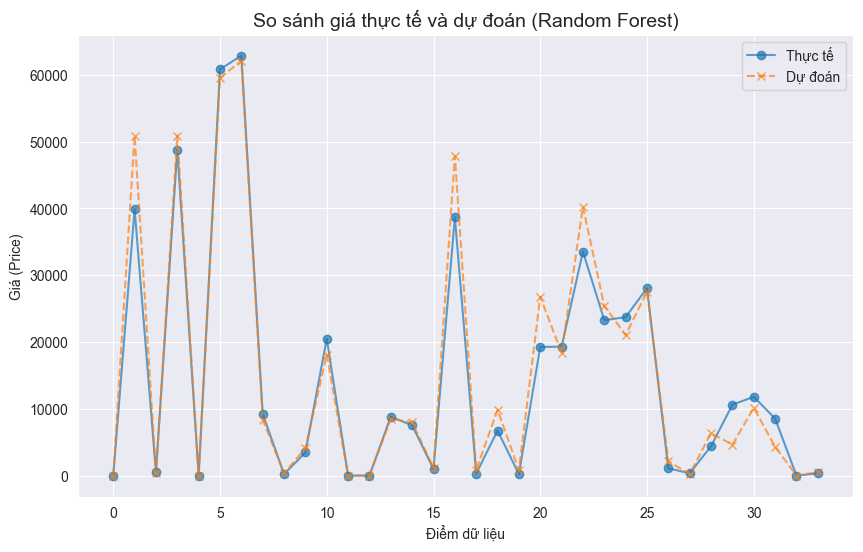

In [77]:
# Dự đoán giá với mô hình Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)

# 1. Biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Thực tế", linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred_rf, label="Dự đoán", linestyle='--', marker='x', alpha=0.7)
plt.title("So sánh giá thực tế và dự đoán (Random Forest)", fontsize=14)
plt.xlabel("Điểm dữ liệu")
plt.ylabel("Giá (Price)")
plt.legend()
plt.grid(True)
plt.show()


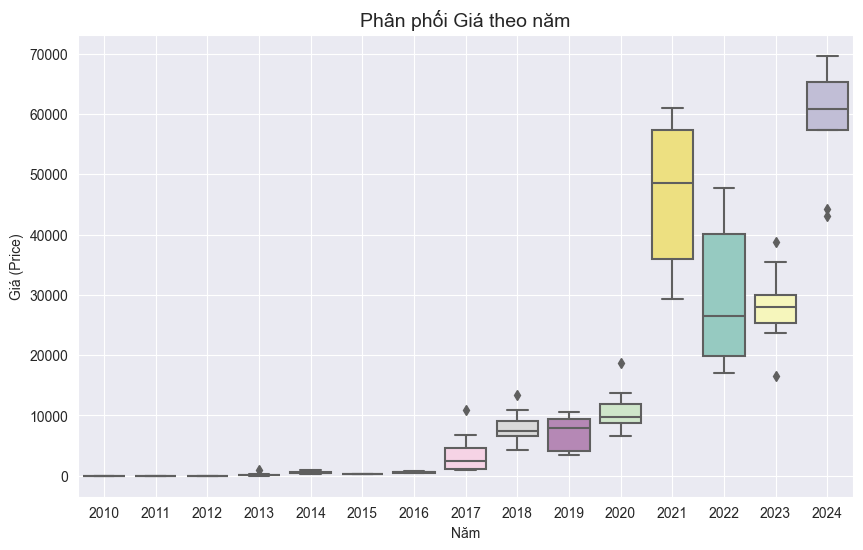

In [83]:
# Biểu đồ hộp cho Giá theo năm
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price', data=combined_data, palette="Set3")
plt.title("Phân phối Giá theo năm", fontsize=14)
plt.xlabel("Năm")
plt.ylabel("Giá (Price)")
plt.grid(True)
plt.show()

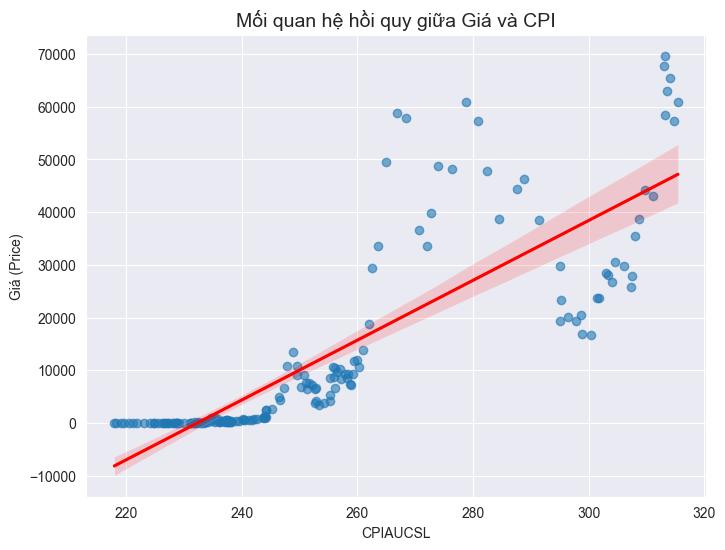

In [82]:
# Biểu đồ hồi quy giữa Giá và CPI
plt.figure(figsize=(8, 6))
sns.regplot(x='CPIAUCSL', y='Price', data=combined_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Mối quan hệ hồi quy giữa Giá và CPI", fontsize=14)
plt.xlabel("CPIAUCSL")
plt.ylabel("Giá (Price)")
plt.grid(True)
plt.show()

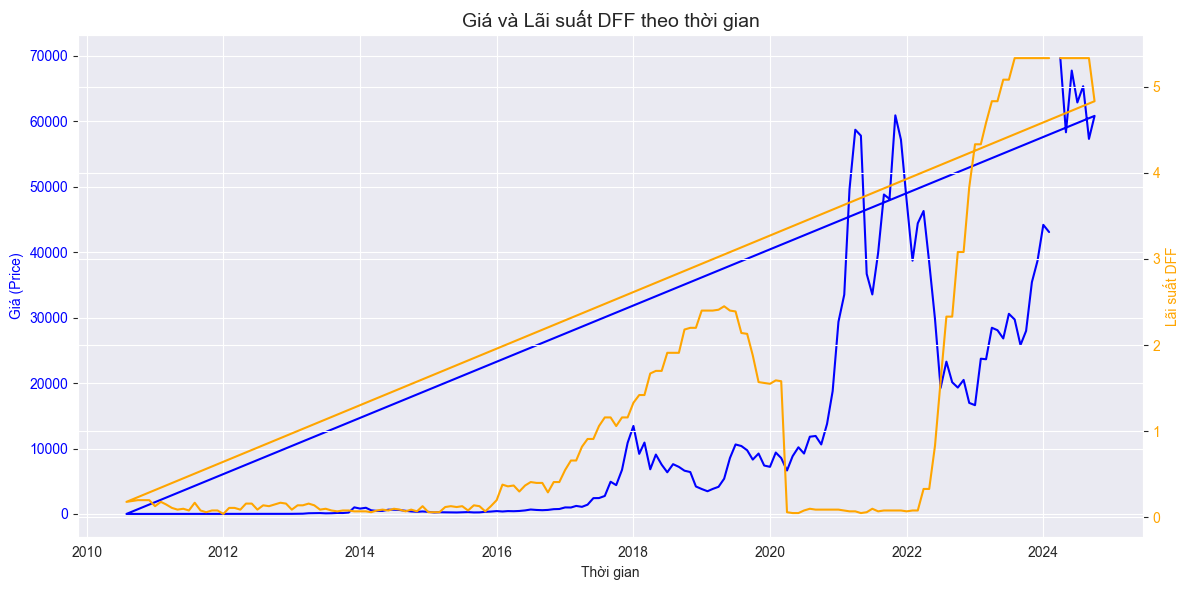

In [92]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục y đầu tiên cho Price
ax1.plot(combined_data['Date'], combined_data['Price'], color='blue', label="Price")
ax1.set_xlabel("Thời gian")
ax1.set_ylabel("Giá (Price)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Trục y thứ hai cho DFF
ax2 = ax1.twinx()
ax2.plot(combined_data['Date'], combined_data['DFF'], color='orange', label="DFF")
ax2.set_ylabel("Lãi suất DFF", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Giá và Lãi suất DFF theo thời gian", fontsize=14)
fig.tight_layout()
plt.show()


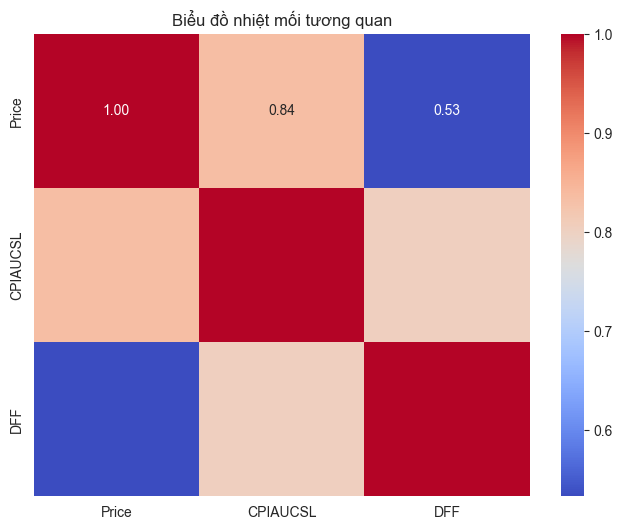

In [93]:
# Tính ma trận tương quan
correlation_matrix = combined_data[['Price', 'CPIAUCSL', 'DFF']].corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Biểu đồ nhiệt mối tương quan")
plt.show()
